In [2]:
import keras
from keras import layers

<h4>Autoencoder Simple, ejemplo de keras<h/4>

In [3]:
dimension_de_ecoder = 32 # 32 flotantes -> factor de compresión 24.5, asumiendo que la entrada es de 784 flotantes

imagen_entrada = keras.Input(shape=(784,)) # 28x28 pixeles

# Capa de encoder, es la capa que comprime la entrada
capa_encoder = layers.Dense(dimension_de_ecoder, activation='relu')(imagen_entrada)
# Capa de decoder, es la capa que descomprime la entrada
capa_decoder = layers.Dense(784, activation='sigmoid')(capa_encoder)
# Modelo que mapea una entrada a su reconstrucción
autoencoder = keras.Model(imagen_entrada, capa_decoder)

In [4]:
#Este modelo mapea una entrada a su representación comprimida
encoder = keras.Model(imagen_entrada, capa_encoder)

In [5]:
#Este es el modelo del decoder
imagen_comprimida = keras.Input(shape=(dimension_de_ecoder,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(imagen_comprimida, decoder_layer(imagen_comprimida))

Se entrena ahora el autoencoder para reconstruir los digitos MNIST.

Primero, se configura el modelo para realizar un "binary crossentropy" junto con el optimizador de Adam https://keras.io/api/optimizers/adam/

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Se prepara la data que se va a estudiar los digitos de MNIST, ahora se normalizan los valores entre 0 y 1 y se aplanaran las imagenes 28x28 en vectores de tamaño 784

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3813 - val_loss: 0.1938
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1824 - val_loss: 0.1533
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1489 - val_loss: 0.1316
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1300 - val_loss: 0.1191
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1187 - val_loss: 0.1109
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1109 - val_loss: 0.1052
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1058 - val_loss: 0.1015
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1019 - val_loss: 0.0983
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0994 - val_loss: 0.0961
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0973 - val_loss: 0.0947
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0963 - val_loss: 0.0938
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


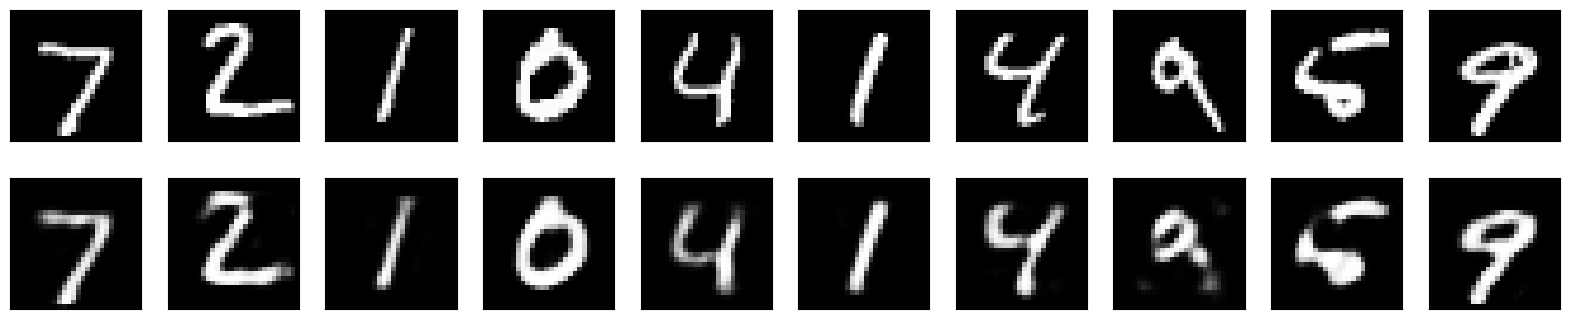

In [11]:
import matplotlib.pyplot as plt

n = 10  # cuántas dígitos vamos a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # mostrar la imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar la reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
